## Assignment 3
### Mihkel Sildnik & Julio Ponte

In [1]:
import numpy as np
# If we initialize the random number generator before loading Keras, we'll get the same
# result each time we run the notebook.
np.random.seed(0)

import tensorflow as tf
import time

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

img_dir = 'pa3_images'
img_size = 64
batch_size = 32

train_generator = data_gen.flow_from_directory(
                    img_dir + '/train',
                    target_size = (img_size, img_size),
                    batch_size = batch_size,
                    class_mode = 'binary',
                    classes = ['other', 'car'],
                    seed = 12345,
                    shuffle = True
                    )

Found 1600 images belonging to 2 classes.


In [3]:
Xbatch, Ybatch = train_generator.next()

In [4]:
Xbatch.shape

(32, 64, 64, 3)

In [5]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

img_dir = 'pa3_images'
img_size = 64
batch_size = 32

validation_generator = data_gen.flow_from_directory(
                    img_dir + '/validation',
                    target_size = (img_size, img_size),
                    batch_size = batch_size,
                    class_mode = 'binary',
                    classes = ['other', 'car'],
                    seed = 12345,
                    shuffle = True
                    )

Found 576 images belonging to 2 classes.


is it a car? :  1.0


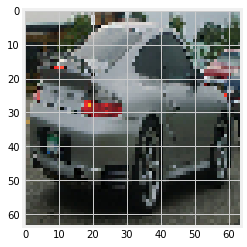

In [6]:
plt.imshow(Xbatch[0])
print("is it a car? : ", Ybatch[0])

In [7]:
def make_convnet():
    #Build the keras convolutional NN
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(filters=2**7, kernel_size=(5,5), activation="relu", strides=(2, 2), input_shape=(64,64,3)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(4,4), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(filters=2**5, kernel_size=(3,3), activation="relu", strides=(2, 2)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(filters=2**4, kernel_size=(1,1), activation="relu", strides=(1, 1)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(64, activation="relu"))
    model.add(tf.keras.layers.Dense(1   , activation="sigmoid"))
    model.compile(loss='binary_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    return model

In [9]:
#Train it and time it
model = make_convnet()
start_time = time.time()
history = model.fit(train_generator, epochs = 50, verbose = 1, validation_data=validation_generator)
end_time = time.time()
minutes = (end_time - start_time)/60
print("Total training time elapsed (minutes): ", minutes)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 50 steps, validate for 18 steps
Epoch 1/50
50/50 [==============================] - 8s 150ms/step - loss: 0.6943 - accuracy: 0.4938 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 2/50
50/50 [==============================] - 6s 121ms/step - loss: 0.6930 - accuracy: 0.4975 - val_loss: 0.6917 - val_accuracy: 0.5087
Epoch 3/50
50/50 [==============================] - 6s 126ms/step - loss: 0.6841 - accuracy: 0.5719 - val_loss: 0.6854 - val_accuracy: 0.5660
Epoch 4/50
50/50 [==============================] - 6s 128ms/step - loss: 0.6621 - accuracy: 0.6094 - val_loss: 0.6515 - val_accuracy: 0.6545
Epoch 5/50
50/50 [==============================] - 7s 133ms/step - loss: 0.6230 - accuracy: 0.6525 - val_loss: 0.6294 - val_accuracy: 0.6667
Epoch 6/50
50/50 [==============================] - 7s 135ms/step - loss: 0.5928 - accuracy: 0.6831 - val_loss: 0.6205 - val_accuracy: 0.6719
Epoch 7/50
50/50 [==============================] - 6s 1

Text(0.5, 1.0, 'Loss')

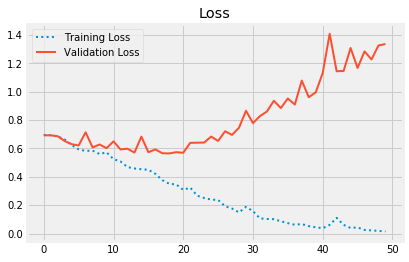

In [10]:
#Plot the losses
training_loss = history.history.get('loss')
validation_loss = history.history.get('val_loss')

plt.plot(history.epoch, training_loss, linewidth=2, linestyle=':', label = 'Training Loss')
plt.plot(history.epoch, validation_loss, linewidth=2, label = 'Validation Loss')
plt.legend()
plt.title("Loss")

Text(0.5, 1.0, 'Accuracy')

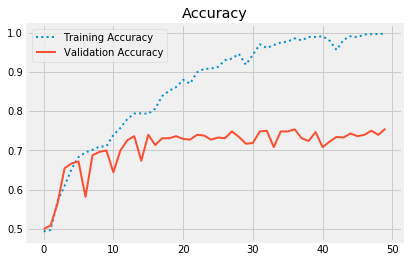

In [11]:
#Plot the accuracies
training_acc = history.history.get('accuracy')
validation_acc = history.history.get('val_accuracy')

plt.plot(history.epoch, training_acc, linewidth=2, linestyle=':', label = 'Training Accuracy')
plt.plot(history.epoch, validation_acc, linewidth=2, label = 'Validation Accuracy')
plt.legend()
plt.title("Accuracy")

In [12]:
#Evaluate the model with the the validation data
score = model.evaluate(validation_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

  ...
    to  
  ['...']
Test loss: 1.3345765786038504
Test accuracy: 0.7552083


From this graph, the effect of overfitting is clear, training accuracy keeps going up while the validation accuracy at first climbs slightly, and stabilizes at around 70% with noticeable variation between epochs.

In [13]:
# Optionally save weights learnt by the CNN
# model.save_weights('50_epochs')

### Part 2

Using an image data generator with data augmentation. Augmentation helps with overfitting.

In [14]:
img_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
                    rotation_range=90, 
                    width_shift_range=0.3, 
                    height_shift_range=0.3, 
                    brightness_range=[0.1, 0.9],
                    shear_range=20.0, 
                    rescale=1.0/255)

aug_training_generator = img_data_gen.flow_from_directory(
                    img_dir + "/train",
                    target_size = (img_size, img_size),
                    batch_size = batch_size,
                    class_mode = 'binary',
                    classes = ['other', 'car'],
                    seed = 12345,
                    shuffle = True)

Found 1600 images belonging to 2 classes.


In [15]:
#Train and time the model once again, using augmented data
start_time1 = time.time()
history = model.fit(aug_training_generator, epochs = 50, verbose = 1, validation_data=validation_generator)
end_time1 = time.time()
minutes1 = (end_time1 - start_time1)/60
print("Total training time elapsed (minutes): ", minutes1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 50 steps, validate for 18 steps
Epoch 1/50
50/50 [==============================] - 9s 183ms/step - loss: 0.8494 - accuracy: 0.5944 - val_loss: 0.7557 - val_accuracy: 0.6319
Epoch 2/50
50/50 [==============================] - 9s 180ms/step - loss: 0.6368 - accuracy: 0.6425 - val_loss: 0.8780 - val_accuracy: 0.6215
Epoch 3/50
50/50 [==============================] - 10s 197ms/step - loss: 0.6264 - accuracy: 0.6444 - val_loss: 0.6507 - val_accuracy: 0.7031
Epoch 4/50
50/50 [==============================] - 11s 212ms/step - loss: 0.6127 - accuracy: 0.6681 - val_loss: 0.7459 - val_accuracy: 0.6667
Epoch 5/50
50/50 [==============================] - 9s 177ms/step - loss: 0.6142 - accuracy: 0.6631 - val_loss: 0.6117 - val_accuracy: 0.7135
Epoch 6/50
50/50 [==============================] - 9s 182ms/step - loss: 0.5956 - accuracy: 0.6787 - val_loss: 0.6099 - val_accuracy: 0.6997
Epoch 7/50
50/50 [==============================] - 9s

Text(0.5, 1.0, 'Loss')

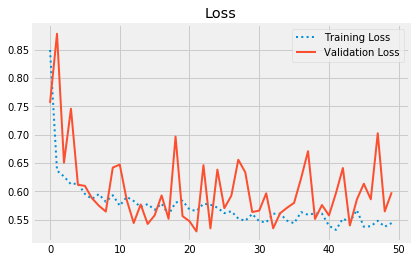

In [16]:
#Plot losses
training_loss_aug = history.history.get('loss')
validation_loss_aug = history.history.get('val_loss')

plt.plot(history.epoch, training_loss_aug, linewidth=2, linestyle=':', label = 'Training Loss')
plt.plot(history.epoch, validation_loss_aug, linewidth=2, label = 'Validation Loss')
plt.legend()
plt.title("Loss")

Text(0.5, 1.0, 'Accuracy')

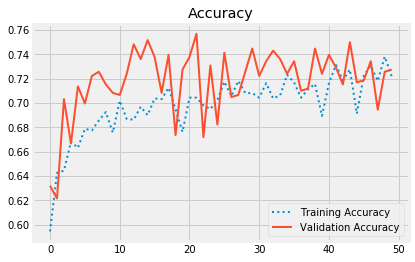

In [17]:
#Plot accuracies
training_acc_aug = history.history.get('accuracy')
validation_acc_aug = history.history.get('val_accuracy')

plt.plot(history.epoch, training_acc_aug, linewidth=2, linestyle=':', label = 'Training Accuracy')
plt.plot(history.epoch, validation_acc_aug, linewidth=2, label = 'Validation Accuracy')
plt.legend()
plt.title("Accuracy")

In [18]:
#Evaluate the model
score = model.evaluate(validation_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

  ...
    to  
  ['...']
Test loss: 0.5984493907954958
Test accuracy: 0.7274306


In this graph the results from data augmentations are immediately visible, the validation accuracy is still at around 70% 
accuracy, but overfitting of the training set is nowhere neas as strong as when using the image data generator without data augmentation.
We can also see that the validation accuracy is actually higher for most epochs.

### Interlude

In [19]:
#Load the VGG-16 layer CNN model from keras
vggmodel = tf.keras.applications.VGG16(weights='imagenet', include_top=True)

In [20]:
#Show an image, and process the image in order to show predictions from VGG
image_location = "pa3_images/train/car/0177.jpg"
ImageVGG = tf.keras.preprocessing.image.load_img(image_location, target_size=(224,224))
array_Image = tf.keras.preprocessing.image.img_to_array(ImageVGG)
array_Image = tf.keras.applications.vgg16.preprocess_input(array_Image)
array_Image = array_Image.reshape(1, 224, 224, 3)

In [21]:
#Show predictions
prediction = vggmodel.predict(array_Image)
tf.keras.applications.vgg16.decode_predictions(prediction)

[[('n04037443', 'racer', 0.7865822),
  ('n04285008', 'sports_car', 0.13090539),
  ('n04461696', 'tow_truck', 0.02391978),
  ('n03895866', 'passenger_car', 0.021518473),
  ('n02974003', 'car_wheel', 0.016144866)]]

We can clearly see that the top prediction (the one with the most probability) is correct in labeling the image as a 'racer' car. 
The model's following predictions are also all vehicles or a car wheel which shows that the model is working great.

### Part 3

Transfer learning, which means that we leverage the knowledge stored in a pre-trained model and apply it to our specific task.

To get started, we load the VGG-16 model once more.

In [22]:
feature_extractor = tf.keras.applications.VGG16(include_top = False, weights = "imagenet", input_shape=(img_size, img_size, 3))

Before reading the images, we need to create a new ImageDataGenerator that applies preprocess_input (the preprocessing required for VGG-16) to the images that it processes.

In [23]:
vgg_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [24]:
#Save the features that were learned by VGG 16. Save them as np array 
def create_vgg_features(from_directory, mode):
    generator = vgg_data_gen.flow_from_directory(
                    from_directory,
                    target_size = (img_size, img_size),
                    batch_size = batch_size,
                    class_mode = 'binary',
                    classes = ['other', 'car'],
                    seed = 12345,
                    shuffle = False
                    )
    
    assert(mode=='training' or mode=='validation')
    
    cnn_features = feature_extractor.predict(generator)
        
    with open("vgg_features_"+mode, 'wb') as file:
        np.save(file, cnn_features)
        

In [25]:
img_dir = 'pa3_images'
img_size = 64
batch_size = 32


create_vgg_features(img_dir+"/train", "training")

Found 1600 images belonging to 2 classes.


In [26]:
create_vgg_features(img_dir+"/validation", "validation")

Found 576 images belonging to 2 classes.


In [27]:
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [28]:
#Helper function
def create_base_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(img_size, activation= "relu"))
    model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))
    model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
    return model

In [29]:
def get_labels(n):
    return np.array([0]*(n//2) + [1]*(n//2))

In [30]:
#Load the learnt features and train a model that "piggy backs" on these.
def train_on_cnnfeatures(train_data, val_data):
    
    with open(train_data, 'rb') as file_train:
        training_data = np.load(file_train)
        
    with open(val_data, 'rb') as file_val:
        validation_data = np.load(file_val)
    
    Y_train = get_labels(len(training_data))
    Y_val = get_labels(len(validation_data))
    trained_model = KerasClassifier(build_fn=create_base_model, epochs=50, batch_size=5, verbose=1)
    trained_model.fit(training_data, Y_train)
    print("\n Trained model accuracy: ", accuracy_score(Y_val, trained_model.predict(validation_data)))

train_on_cnnfeatures("vgg_features_training", "vgg_features_validation")


Train on 1600 samples
Epoch 1/50
1600/1600 [==============================] - 1s 542us/sample - loss: 1.0564 - accuracy: 0.8512
Epoch 2/50
1600/1600 [==============================] - 1s 347us/sample - loss: 0.1397 - accuracy: 0.9475
Epoch 3/50
1600/1600 [==============================] - 1s 337us/sample - loss: 0.0442 - accuracy: 0.9831
Epoch 4/50
1600/1600 [==============================] - 1s 339us/sample - loss: 0.0128 - accuracy: 0.9956
Epoch 5/50
1600/1600 [==============================] - 1s 340us/sample - loss: 0.0135 - accuracy: 0.9969
Epoch 6/50
1600/1600 [==============================] - 1s 337us/sample - loss: 0.0054 - accuracy: 0.9981
Epoch 7/50
1600/1600 [==============================] - 1s 394us/sample - loss: 8.9665e-04 - accuracy: 1.0000
Epoch 8/50
1600/1600 [==============================] - 1s 393us/sample - loss: 2.9979e-04 - accuracy: 1.0000
Epoch 9/50
1600/1600 [==============================] - 1s 353us/sample - loss: 2.1529e-04 - accuracy: 1.0000
Epoch 10/50


The accuracy this time is around 90%, this is a lot better than the results we got from our CNN previously. 
This is almost certainly because our CNN was unable to extract the features from the images. We used the same neural network on the 
features as we used in our model previously after convolution and pooling. This shows that the CNN part of our previous model
was the weak link.  

### Part 4

In [31]:
#Get patterns learnt by the first convolutional layer of the feature extractor
first_layer_weights = vggmodel.get_weights()[0]
print(first_layer_weights.shape)

def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k

(3, 3, 3, 64)


In [32]:
positive_images = [kernel_image(first_layer_weights, x, True) for x in range(64)]
negative_images = [kernel_image(first_layer_weights, x, False) for x in range(64)]

FILTER No.0 
 POSITIVE                                           NEGATIVE


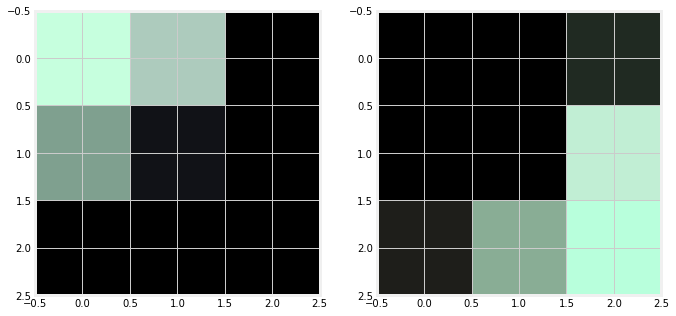

FILTER No.8 
 POSITIVE                                           NEGATIVE


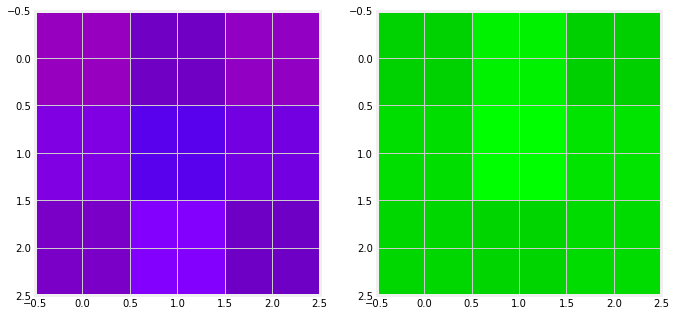

FILTER No.16 
 POSITIVE                                           NEGATIVE


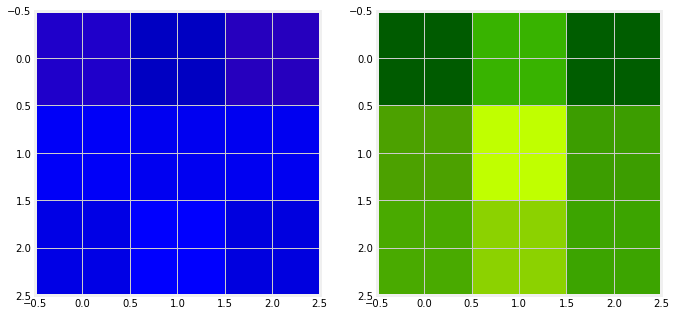

FILTER No.24 
 POSITIVE                                           NEGATIVE


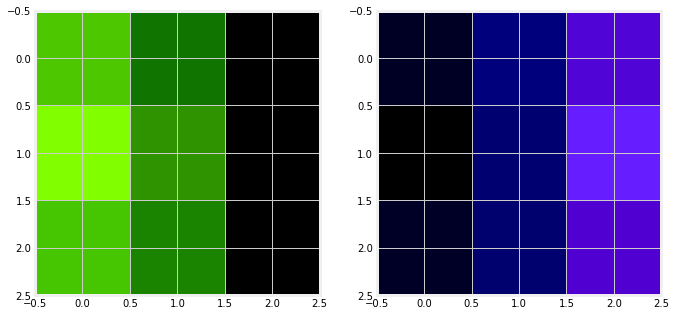

FILTER No.32 
 POSITIVE                                           NEGATIVE


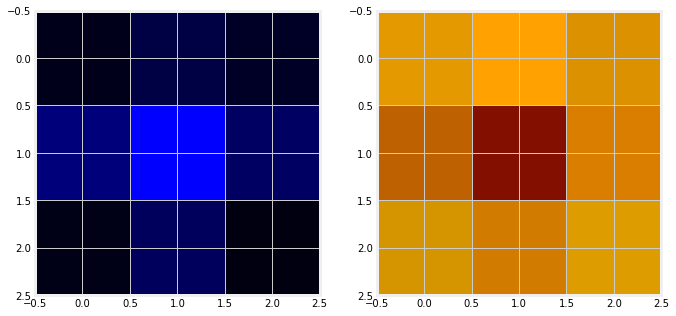

FILTER No.40 
 POSITIVE                                           NEGATIVE


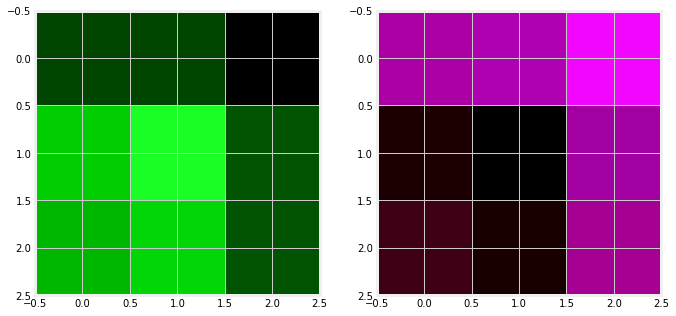

FILTER No.48 
 POSITIVE                                           NEGATIVE


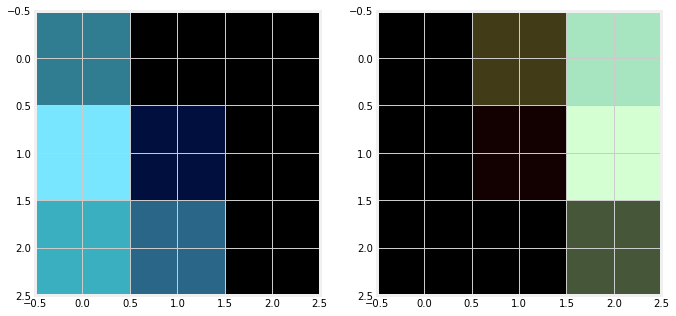

FILTER No.56 
 POSITIVE                                           NEGATIVE


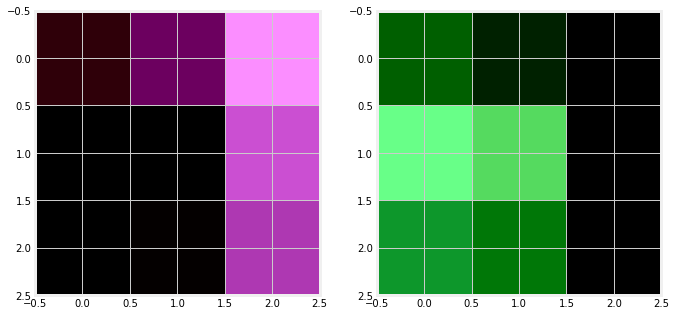

In [33]:
plt.style.use('seaborn-bright')
for index in range(0, len(positive_images), 8):
    print("FILTER No."+str(index), '\n', f'{"POSITIVE": <50} NEGATIVE')
    figu = plt.figure(figsize = (10,10))
    figu.add_subplot(1,2,1)
    plt.imshow(positive_images[index])
    figu.add_subplot(1,2,2)
    plt.imshow(negative_images[index])
    plt.show()

These images show some (8 pairs, adjustable with the last parameter in the loop in the previous cell) of the patterns 
learnt by the convolutional neural network. This works by loading the weights of a pre-trained model that was exposed
to a lot more data than we have available; with these weights, we feed the pre-trained model our images and extract 
the features that this pre-trained convolutional neural network (VGG16) can identify. We trust that VGG16, due to it 
being trained on a larger dataset, can identify features from our images much better than a model that we build from 
scratch and train on our own data.

The images show the learnt patterns from the first convolutional layer which shows the most basic patterns it identifies
(before going through the pooling layers). It is easy to see especially from filters No.0, 24, 32 some of the patterns
that it looks at. It should be noted that because the kernel is only 3x3 it is hard to get any insight into the filters.
 Nonetheless, the difference between positive and negative 
"sides" of the patterns is indeed noticeable.  